In [12]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
from skimage import color
from skimage import io
import seaborn as sns
import math
import cv2
from sewar.full_ref import uqi, psnr, rmse, ssim
import pandas as pd
sns.set()
from scipy import signal
%matplotlib inline

In [13]:
img_paths=os.listdir('train_cleaned')
img_paths=['train_cleaned/'+x for x in img_paths]
cleaned_img=[cv2.imread(x, cv2.IMREAD_GRAYSCALE) for x in img_paths]

In [15]:
img_paths=os.listdir('train')
img_paths=['train/'+x for x in img_paths]
dirty_img=[io.imread(x) for x in img_paths]

In [77]:
def median_subtract(noisy_img):
    background=cv2.medianBlur(noisy_img, 23)
    result=cv2.subtract(background, noisy_img)
    result=cv2.bitwise_not(result)
    return (result, background)

In [78]:
denoised=cleaned_img[0]
result, background=median_subtract(dirty_img[0])
print(rmse(denoised, result))

19.863587813164255


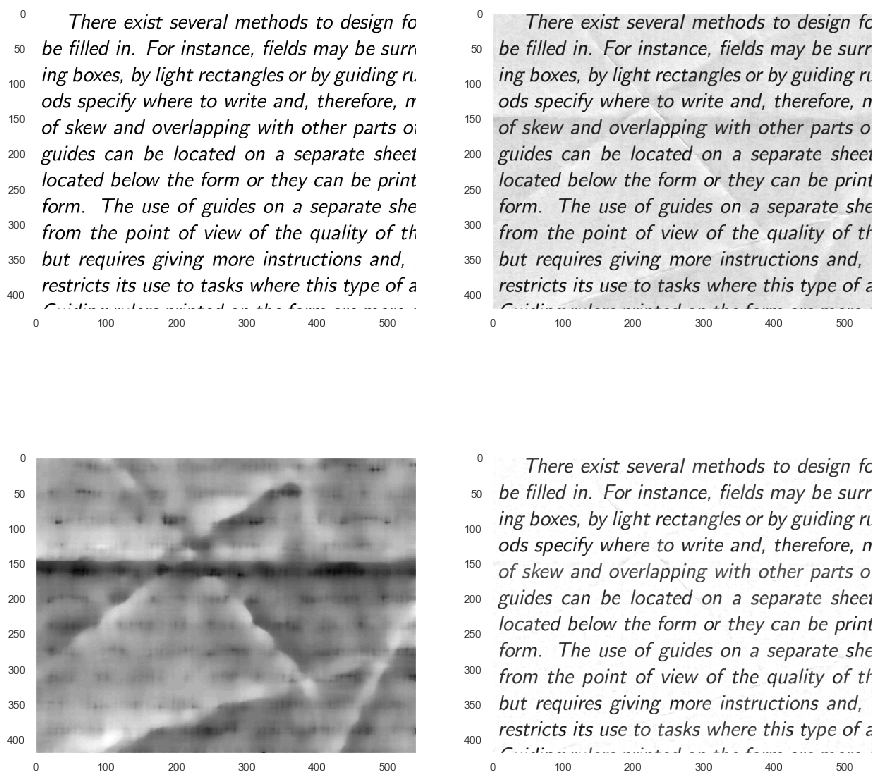

In [79]:
plt.rcParams["axes.grid"] = False
fig, axarr= plt.subplots(2,2, figsize=(15,15))
axarr[0,0].imshow(denoised, cmap='gray')
axarr[0,1].imshow(dirty_img[0], cmap='gray')
axarr[1,0].imshow(background, cmap='gray')
axarr[1,1].imshow(result, cmap='gray')

In [80]:
denoised=cleaned_img[-1]
result, background=median_subtract(dirty_img[-1])
print(rmse(denoised, result))

21.551074951604267


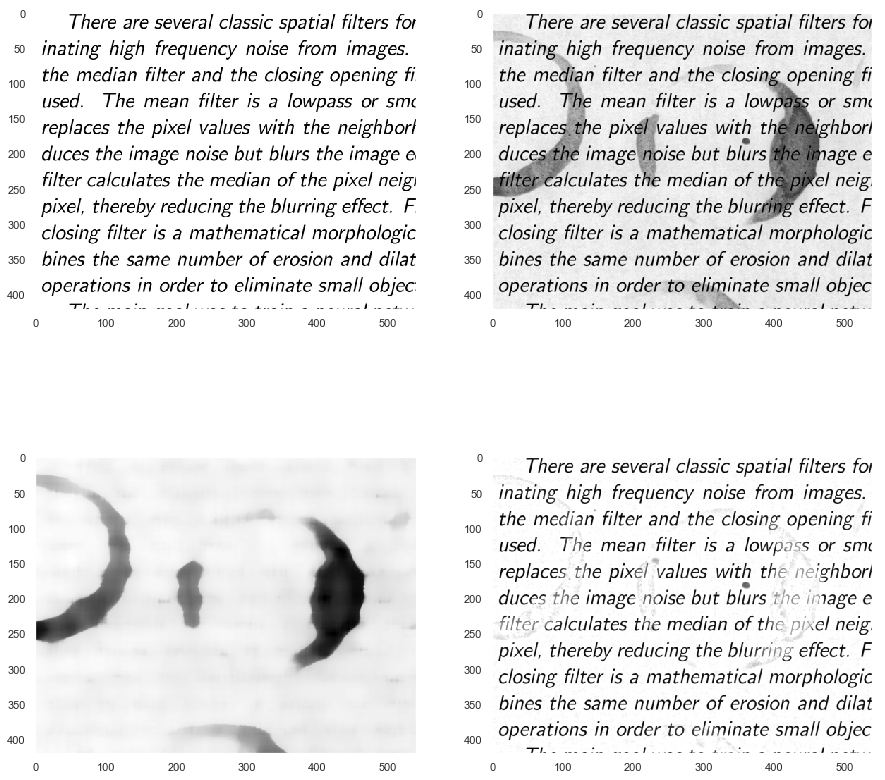

In [81]:
plt.rcParams["axes.grid"] = False
fig, axarr= plt.subplots(2,2, figsize=(15,15))
axarr[0,0].imshow(denoised, cmap='gray')
axarr[0,1].imshow(dirty_img[-1], cmap='gray')
axarr[1,0].imshow(background, cmap='gray')
axarr[1,1].imshow(result, cmap='gray')